<a href="https://colab.research.google.com/github/simpleParadox/PSYCO-576-Fall-2020/blob/master/PSYCO_576_ML_for_Psychology_DW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the first Data Workshop!**

In this workshop, we will look at some ways to inspect data and get feel for a sample brain imaging data. We will also be prepared for data workshop 2 where we will implement a machine learning pipeline.

Note: Before proceeding with this notebook, it is expected that you are familiar with python. You can always come back to this notebook and go through it.

###**Goals and learning objectives:**


1.   Inspect EEG and MEG data.
2.   Performing operations on the data.
3.   Visualize data.




We will use the 'mne' python package to work with EEG data: 
https://mne.tools/stable/index.html \\

Full API reference: https://mne.tools/stable/python_reference.html \\



Full dataset description: \\
https://mne.tools/stable/overview/datasets_index.html#sample
We will use this dataset because it has been well-studied and also provides a benchmark for any EEG/MEG related analysis.


Here's a link to various tutorials on how to read raw files.
https://mne.tools/stable/auto_examples/index.html#input-output


If you want to read fMRI files, the following packages might be helpful. \\
https://nipy.org/nibabel/ (for .img files) \\
https://pydicom.github.io/ (for files in DICOM format).


Paper that provides more in-depth understanding of the analysis.
https://www.frontiersin.org/articles/10.3389/fnins.2013.00267/full


**NOTE**: You are free to use any software package of your choice. We use MNE here because it's easy to use and has a lot of inbuilt predefined functions for complex analyses.

Let's get it done! Let's get it done! 🙌

In [30]:
# Install mne
!pip install mne

In [3]:
# First we will load the necessary ppython packages.
import numpy as np
import os
import mne

In [4]:
# mne.__version__

Download the dataset into Google Colab. It will download the dataset first if you don't have it. \\
NOTE: The dataset size is ~ 1.5 GB so it might take a minute.
The dataset is stored in the ~/ root / mne_data directory in this colab notebook.

In [5]:
sample_data_folder = mne.datasets.sample.data_path()

Using default location ~/mne_data for sample...
Creating ~/mne_data



Verifying hash 12b75d1cb7df9dfb4ad73ed82f61094f.
Decompressing the archive: /root/mne_data/MNE-sample-data-processed.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['/root/mne_data/MNE-sample-data']
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json


The data were acquired with the Neuromag Vectorview system at MGH/HMS/MIT Athinoula A. Martinos Center Biomedical Imaging. EEG data from a 60-channel electrode cap was acquired simultaneously with the MEG. The original MRI data set was acquired with a Siemens 1.5 T Sonata scanner using an MPRAGE sequence.


In this experiment, checkerboard patterns were presented to the subject into the left and right visual field, interspersed by tones to the left or right ear. The interval between the stimuli was 750 ms. Occasionally a smiley face was presented at the center of the visual field. The subject was asked to press a key with the right index finger as soon as possible after the appearance of the face.



Now let's load the raw files from the downloaded data. \\
You may see some variables such PCA-V1..., these are projection components that are used to account for the environmental noise in the MEG signals. \\
While implementing machine learning models, we will have to make sure that the data is cleaned.

Let's first read the data and store it in a python variable. The data is of type .fif which is a common brain-imaging data format [read_raw_fif](https://mne.tools/stable/generated/mne.io.read_raw_fif.html#mne.io.read_raw_fif). MNE also provides functions to read other types of data. \\
Here's a list of functions: https://mne.tools/stable/python_reference.html#reading-raw-data

In [35]:
# Define the path. You can use this to read any file of the .fif format.
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)  # Read the raw .fif file.

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0


A useful thing to know would be to understand the structure of the **Raw** object. It contains all the information of the experiment structured in an easy to access way.

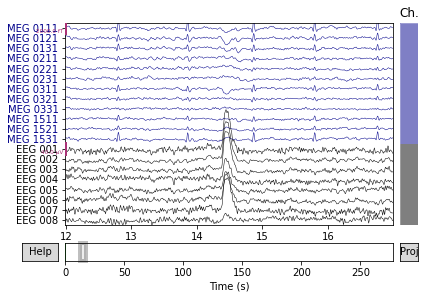

In [36]:
chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531',
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
fig = raw.plot(order=chan_idxs, start=12,duration=5, n_channels=len(chs))  # Adjust the number of channels to visualize different results.
fig.show()

# chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
#        'MEG 0311', 'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005']
# chan_idxs = [raw.ch_names.index(ch) for ch in chs]
# fig = raw.plot(order=chan_idxs, start=12, duration=5)  
# fig.show()

# Let's try to find the events that the participants were a part of during the study.


We will use the [find_events](https://mne.tools/dev/generated/mne.find_events.html#mne.find_events) function to retrieve the events from the **raw** data.

In [24]:
# We will simply use the inbuilt functions find_events()
events = mne.find_events(raw, stim_channel='STI 014')  # All the events are stored in the 'STI 014' channel. This might different for other systems. (This is for NeuroMag)
print(events[:10])  # show the first 10 events. # The last column is the 

319 events found
Event IDs: [ 1  2  3  4  5 32]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]
 [7506    0    3]
 [7612    0    1]
 [7709    0    4]
 [7810    0    2]
 [7916    0    3]]


The first line in the output 'Event IDs' is the list of event IDs that corresponds to the figure below.

Now let's define the type of events that are contained in the dataset. Here are the trigger codes.
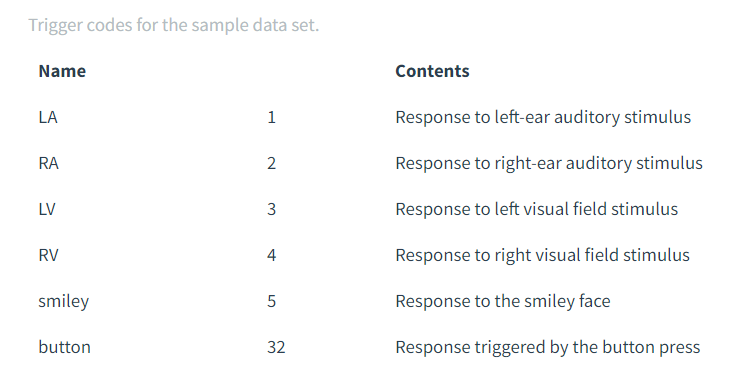


In [29]:
# First create the events dictionary to map the trigger codes with the legend.
events_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}  

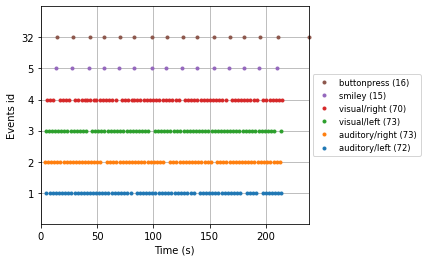

In [28]:
fig = mne.viz.plot_events(events, event_id=events_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)  # 'sfreq' is the sampling rate for the data collection.

Each point on the plot shows what the event is and when that event occured.

# Brief overview on how to preprocess data with mne.

Usually when we record data during the experiments, there is a lot of noise that sneaks in. Using various techniques, you clean up the data. We will use Independent Component Analysis. \\
Note: **This is just an example to show you that mne has inbuilt functions for preprocessing. We will not discuss ICA or any other techniques and leave it till the next data workshop.**

Todo: Explain ICA briefly here

In [37]:
# An example of using Independent Component Analysis to clean up data. We will inspect such techniques in more detail in the next workshop.
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)  # Initialize the ICA class.
ica.fit(raw)  # Fit the ICA model with the data. Get the components
ica.exclude = [1, 2]  # Components to exlcude.

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 4.7s.


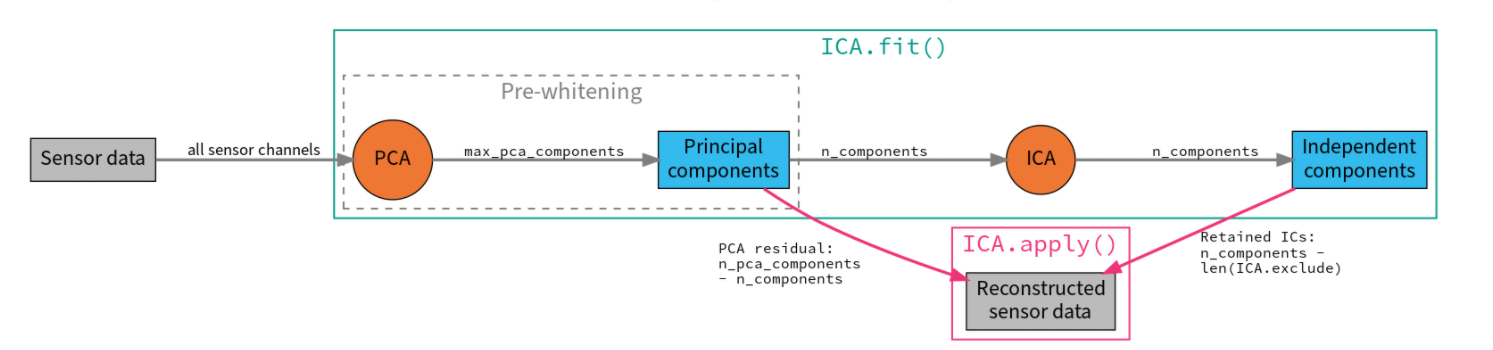

In the following cell(hidden) we inspect how different the data after cleaning it up.

Transforming to ICA space (20 components)
Zeroing out 2 ICA components


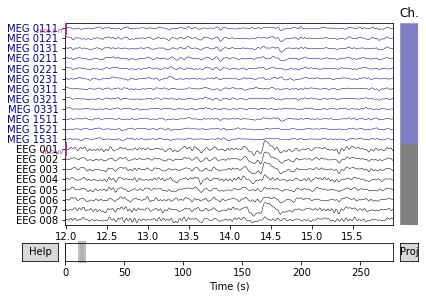

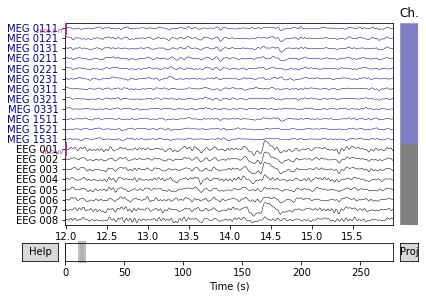

In [162]:
#@title This cell applies the ICA to some of the channels and shows a comparison before and after applying ICA. Run this to see results.
#Make a copy of the original raw data.
orig_raw = raw.copy()
raw.load_data()  # Load the data into memory.
ica.apply(raw)  # Apply the ICA transformation.

# show some frontal channels to clearly illustrate the artifact removal
chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531',
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_fig = orig_raw.plot(order=chan_idxs, start=12, duration=4)
orig_fig.show()
fig = raw.plot(order=chan_idxs, start=12, duration=4)
fig.show()

#### We looked at reading, inspecting, and visualizing data. After going through the above cells, you should have a good understanding of some of the functions that you can use to work with brain imaging data.

#### There are many other functions to inspect and visualize data that will be a lot to cover in this notebook. I would recommend checking it out in your free time. [Here's](https://mne.tools/dev/auto_tutorials/intro/plot_10_overview.html#sphx-glr-auto-tutorials-intro-plot-10-overview-py) the link.

# Preparing data for modelling.

##### Now that we have a general idea of how mne works, we can move on to some other important concepts before we use machine learning.

The raw data contains the raw data from which an **Epochs** object can be created.

The Epochs class just makes it easier for us to obtain the data in a matrix format which can be used while training a machine learning algorithm. \\
 One may choose to not use the Epochs class and just retrieve the raw object and use a package like numpy to structure the data. Though this works, it requires more time and effort. Using the Epochs class also helps us to use some inbuilt parameters for structuring the data. \\
More information on all the attributes of the **Epochs** class can be found [here](https://mne.tools/stable/generated/mne.Epochs.html#mne-epochs).

In [163]:
# Feed in the raw data and retrieve data from all channels.
epochs = mne.Epochs(raw, events, proj=True, baseline=(None, 0.), preload=True)

319 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Loading data for 319 events and 106 original time points ...
0 bad epochs dropped


Now let's retrieve a well-structured numpy ndarray so that we can use that to fit a machine learning model (next workshop).

In [159]:
X = epochs.get_data()
y = epochs.events[:, 2]

In [146]:
print("The input is of type: ", type(X))
print("The target is of type: ", type(y))

The input is of type:  <class 'numpy.ndarray'>
The target is of type:  <class 'numpy.ndarray'>


Let's look at the shape of X and y.

In [149]:
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (145, 376, 106)
Shape of y:  (145,)


X is a 3-dimensional array. \\
Think about how you could re-structure it by yourself to fit into a mathematical model🤔. \\
No need to implement, we will discuss more in the next workshop.

## Exercise Time!

Retrieve data from the Epochs object so that **X** and **y** contain only the MEG data and only the data corresponding to events 'Auditory/Left' and 'Auditory/Right', i.e. events id '1' and '2'. More details on event ids [here](https://mne.tools/dev/overview/datasets_index.html#id14). \\
A template code is provided for you which you need to fill out.

Hint: You have the modify the signature the mne.Epochs(...) function. Add additional attributes that will help you select specific set of data.
You need to read the [documentation](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs) here to understand the signature of the mne.Epochs function.

In [ ]:
event_id = ...  # Fill this out.
channels = ...  # Fill this out.
epochs = mne.Epochs(raw, events, proj=True, baseline=(None, 0.), preload=True, ..., ...) # Add more parameters to select data.

In [155]:
# Retrieve X and y.

In [156]:
# Inspect the type and shape here.

In [ ]:
#@title Solution (try the exercise first)
picks = ['meg']  # Or any other data type, e.g. EEG.
event_id = {'Left':1, 'Right':2}  # or any other event ids to select.
epochs = mne.Epochs(raw, events, proj=True, baseline=(None, 0.), preload=True, picks=picks, event_id=event_id)

# Conclusion

That was a lot of information!

Let's recap what we learned from this notebook.

1. MNE is a powerful package to carry out analyses related to brain imaging data.
2. We now know how to read data from any brain imaging source and store it in a **Raw** format.
3. We used MNE's inbuilt function to look at the waveforms of the EEG and MEG data.
4. We briefly discussed that MNE also has inbuilt functions to clean data such as using ICA.
5. We finally looked at the **Epochs** class and learned how it helps to structure data based on various parameters.

You should now have a good understanding of what MNE is how it is helpful for our analyses.

We will use a machine learning algorithm in the next workshop. See you then👋❗